In [2]:
%pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, spearmanr
from scipy.stats import kruskal
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler


In [3]:
data = pd.read_csv('palm_ffb.csv')
data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [4]:
# Display summary statistics and Variance
summary_stats = data.describe()
print(summary_stats)

       SoilMoisture  Average_Temp    Min_Temp    Max_Temp  Precipitation  \
count    130.000000    130.000000  130.000000  130.000000     130.000000   
mean     527.646923     26.849918   21.379231   33.851538     188.980769   
std       57.367844      0.651413    0.688971    1.079638      80.237210   
min      380.700000     25.158065   18.900000   31.100000       2.000000   
25%      488.625000     26.442285   21.000000   33.100000     140.300000   
50%      538.300000     26.930645   21.500000   33.900000     182.150000   
75%      571.025000     27.270726   21.800000   34.600000     226.100000   
max      647.300000     28.580000   22.600000   36.000000     496.100000   

       Working_days   HA_Harvested   FFB_Yield  
count    130.000000     130.000000  130.000000  
mean      24.753846  793404.491565    1.602231  
std        1.239289   34440.893854    0.281751  
min       21.000000  683431.944400    1.080000  
25%       24.000000  768966.949100    1.390000  
50%       25.000000  

In [5]:
#Check missing values
data.isnull().any()

Date             False
SoilMoisture     False
Average_Temp     False
Min_Temp         False
Max_Temp         False
Precipitation    False
Working_days     False
HA_Harvested     False
FFB_Yield        False
dtype: bool

<ipython-input-6-da366b0266db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


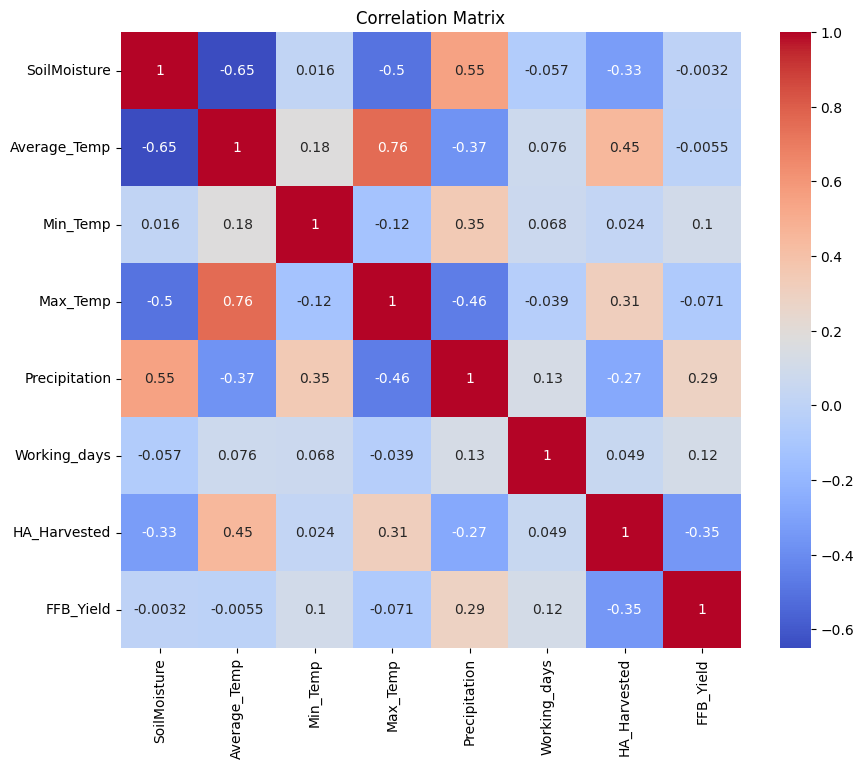

In [6]:
correlation_matrix = data.corr()

# Visualize the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:

cor_target = abs(data.corr()["FFB_Yield"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

<ipython-input-7-048b8f411a7b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_target = abs(data.corr()["FFB_Yield"])


Min_Temp         0.103830
Precipitation    0.289604
Working_days     0.116364
HA_Harvested     0.350222
FFB_Yield        1.000000
Name: FFB_Yield, dtype: float64

In [8]:
#Regression Test
import statsmodels.api as sm

X = data[['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Working_days', 'HA_Harvested']]  # Independent variables
y = data['FFB_Yield']  # Dependent variable

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              FFB_Yield   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     5.935
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           5.92e-06
Time:                        13:41:53   Log-Likelihood:               -0.23443
No. Observations:                 130   AIC:                             16.47
Df Residuals:                     122   BIC:                             39.41
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7331      1.520      1.798

In [9]:
#The coefficient of determination is 0.254, indicating that approximately 25.4% of the variance in the dependent variable (FFB_Yield) is explained by the independent variables in the model.